In [1]:
isLocalServer = True
sys_path_to_be_added = '/notebook/personal/ksuchoi216/FaceID_model_rebuild/'
config_path = './configs/config.json'

%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
import os

def checkLocalServer(isLocalServer, sys_path_to_be_added=None):
    print('='*60)
    print(f'isLocalServer is {isLocalServer}')
    print('='*60)
    
    if isLocalServer is True:
        if sys_path_to_be_added not in sys.path:
            sys.path.insert(0, sys_path_to_be_added)
            os.chdir(sys_path_to_be_added)

checkLocalServer(isLocalServer, sys_path_to_be_added)

from utils import Config_Manager
cfgm = Config_Manager(config_path)
cfg = cfgm.get_cfg()
!pwd
print('='*60)

!nvidia-smi

isLocalServer is True
/notebook/personal/ksuchoi216/FaceID_model_rebuild
Thu Oct 13 15:17:59 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.129.06   Driver Version: 470.129.06   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:04:00.0 Off |                    0 |
| N/A   34C    P0    33W / 250W |      2MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Tesla P1

In [2]:
from execution_model import load_dataloader
threshold = 0.97
save_folder = 'dataloader_'+str(int(threshold*100))
print(save_folder)
dataloader_train = load_dataloader('train', 'data', save_folder)
dataloader_val = load_dataloader('val', 'data', save_folder)
dataloader_test = load_dataloader('test', 'data', save_folder)

dataloaders = {
    "train": dataloader_train,
    "val": dataloader_val,
    "test": dataloader_test
    }

dataloader_97
[train][809] loaded from ./data/dataloader_97/dataloader_train.pt
[val][231] loaded from ./data/dataloader_97/dataloader_val.pt
[test][117] loaded from ./data/dataloader_97/dataloader_test.pt


In [3]:
from execution_model import build_model
cfg['model_dist']['folder_for_data'] = cfg['folder_for_data']
model = build_model(cfg["model_dist"])

isCosSimilarity: False
loading registered photos from ./data/saved_photos
['jhongyoo', 'jhyoo', 'jioh', 'kschoi']
model is DistanceBasedModel


In [4]:
from execution_model import runner_dist
labels_np, preds_np, dists_np = runner_dist(model, 'train', dataloaders)

[train] dataset size: 809
[   0] executing....
[1 1 0 0] labels
[0 0 2 2] preds
[1.3141 1.4081 1.1085 1.0641] dists
[   1] executing....
[   2] executing....
[   3] executing....
[   4] executing....
[   5] executing....
[   6] executing....
[   7] executing....
[   8] executing....
[   9] executing....
[  10] executing....
[  11] executing....
[  12] executing....
[  13] executing....
[  14] executing....
[  15] executing....
[3 1 1 2] labels
[3 0 0 1] preds
[0.8392 1.3939 1.3616 1.2124] dists
[  16] executing....
[  17] executing....
[  18] executing....
[  19] executing....
[  20] executing....
[  21] executing....
[  22] executing....
[  23] executing....
[  24] executing....
[  25] executing....
[  26] executing....
[  27] executing....
[  28] executing....
[  29] executing....
[  30] executing....
[2 2 1 1] labels
[1 1 0 0] preds
[1.0547 1.1934 1.4071 1.3598] dists
[  31] executing....
[  32] executing....
[  33] executing....
[  34] executing....
[  35] executing....
[  36] exec

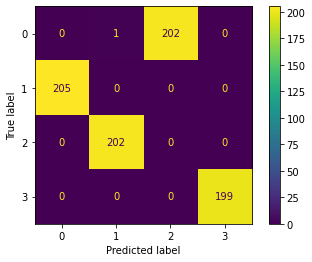

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(labels_np, preds_np)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [5]:
import matplotlib.pyplot as plt
train_evaluation_numpy = train_res_mat
# print(train_evaluation_numpy)

num_epochs, num_evaluations = train_evaluation_numpy.shape
print(num_epochs, num_evaluations)


title_list = ['loss', 'accuracy', 'recall', 'precision']
for col, title in zip(range(0, num_evaluations), title_list):
  plt.figure(figsize=(15, 6), dpi=80)
  plt.title(title)
  plt.ylabel(title)
  plt.xlabel('epoch')
  print(col)
  plt.plot(range(0, num_epochs), train_evaluation_numpy[:, col])
  plt.show()

NameError: name 'train_res_mat' is not defined

In [ ]:
runner(
    model,
    ["test"],
    loss_fn,
    optimizer,
    scheduler,
    dataloaders_test,
    )

Epoch 0/0
test Loss: 1.3621 Acc: 0.9512 recall: 0.9545 Precision: 0.9615 avg_prob: 0.2751
----------------------------------------------------------------------
Training complete in 0m 0s
there is no return value becasue of test mode


In [ ]:
import torch

source_path = './data'
path_for_model = os.path.join(source_path, 'face-classifier-model.pt')

try: 
  torch.save(model.state_dict(), path_for_model)
  print(f'successfully saved model in {path_for_model}')
except:
  print(f'failed saving model in {path_for_model}')

successfully saved model in ./data/face-classifier-model.pt
